In [0]:
import pandas as po
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics/datasets/master/allhypo.train.data.csv"
dataset=po.read_csv(url) 
dataset.head(20)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

In [0]:
dataset.describe()

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.|2466
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,1


Because not all the columns in copy are numeric data, the describe() function cannot provide summary statistics such as mean and standard deviation. Further data processing is required.

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
Age                          2800 non-null object
Sex                          2800 non-null object
On thyroxine                 2800 non-null object
query on thyroxine           2800 non-null object
on antithyroid medication    2800 non-null object
sick                         2800 non-null object
pregnant                     2800 non-null object
thyroid surgery              2800 non-null object
I131 treatment               2800 non-null object
query hypothyroid            2800 non-null object
query hyperthyroid           2800 non-null object
lithium                      2800 non-null object
goitre                       2800 non-null object
tumor                        2800 non-null object
psych                        2800 non-null object
TSH measured                 2800 non-null object
TSH                          2800 non-null object
T3 measured                  2800 non-null 

It looks like when the data was loaded in, all columns were automatically assigned with values of type object--including the obvious numerical columns like age. We can infer this is due to the "?" making the column a string.

Let's make these numerical columns contain the correct type of values. Analyzing the data, we can easily identify the appropriate columns. In addition, we can see that one of the columns ("TBG") has no values at all! Let's clean up the data.

In [0]:
import numpy as np

numeric_columns=list(["Age","TSH","T3","TT4","T4u","FTI"])
dataset=dataset.drop(["TBG","TBG measured"],axis=1)
dataset=dataset.where(dataset!="?",np.nan)
for i in range(len(numeric_columns)):
  dataset[numeric_columns[i]]=dataset[numeric_columns[i]].fillna(dataset[numeric_columns[i]].median(skipna=True))
  dataset[numeric_columns[i]]=dataset[numeric_columns[i]].apply(po.to_numeric)
dataset


,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,referral source,class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,0.98,f,107.0,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,f,2.0,t,109.0,t,0.91,t,120.0,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,0.98,f,107.0,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,...,f,2.0,t,183.0,t,1.30,t,141.0,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,...,f,2.0,t,72.0,t,0.92,t,78.0,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,SVI,negative.|2534


All right, let's take a look now:

In [0]:
dataset[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
Age    2800 non-null float64
TSH    2800 non-null float64
T3     2800 non-null float64
TT4    2800 non-null float64
T4u    2800 non-null float64
FTI    2800 non-null float64
dtypes: float64(6)
memory usage: 131.3 KB


Before we move on, let's run describe() on just the categorical columns.

In [0]:
categorical_columns=dataset.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove("class")

dataset[categorical_columns].describe()

,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5
top,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,other
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2665,2516,2215,2616,2503,2505,1632


Perfect, now let's fix that class feature. According to the note that went with this dataset, the ".|####" refers to a patient number, and is not necessarily relevant for our purposes here.

In [0]:
for i in range(len(dataset)):
  substring=""
  for q in range(len(dataset['class'].iloc[i])):
    if dataset['class'].iloc[i][q]==".":
      dataset['class'].iloc[i]=substring
      break
    substring+=dataset['class'].iloc[i][q]
    
dataset['class']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0                      negative
1                      negative
2                      negative
3                      negative
4                      negative
5                      negative
6                      negative
7                      negative
8                      negative
9                      negative
10                     negative
11                     negative
12                     negative
13                     negative
14                     negative
15      compensated hypothyroid
16                     negative
17                     negative
18                     negative
19                     negative
20                     negative
21                     negative
22                     negative
23                     negative
24                     negative
25                     negative
26                     negative
27                     negative
28                     negative
29                     negative
                 ...           
2770    

Let's check it out now.

In [0]:
dataset['class'].describe()

count         2800
unique           4
top       negative
freq          2580
Name: class, dtype: object

It looks like there are actually 4 unique classification variables! Thank goodness we didn't assume it was binary.

In [0]:
dataset['class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

But let's make it binary anyway.

In [0]:
for i in range(len(dataset)):
  if "hypo" in dataset["class"].iloc[i]:
    dataset["class"].iloc[i]="positive"
dataset["class"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0       negative
1       negative
2       negative
3       negative
4       negative
5       negative
6       negative
7       negative
8       negative
9       negative
10      negative
11      negative
12      negative
13      negative
14      negative
15      positive
16      negative
17      negative
18      negative
19      negative
20      negative
21      negative
22      negative
23      negative
24      negative
25      negative
26      negative
27      negative
28      negative
29      negative
          ...   
2770    negative
2771    negative
2772    positive
2773    negative
2774    negative
2775    negative
2776    negative
2777    negative
2778    negative
2779    negative
2780    negative
2781    negative
2782    negative
2783    negative
2784    negative
2785    negative
2786    negative
2787    negative
2788    negative
2789    negative
2790    negative
2791    negative
2792    negative
2793    negative
2794    negative
2795    negative
2796    negative
2797    negati

Great! Let's see if there's any other records we have to address.

In [0]:
dataset.count()

Age                          2800
Sex                          2690
On thyroxine                 2800
query on thyroxine           2800
on antithyroid medication    2800
sick                         2800
pregnant                     2800
thyroid surgery              2800
I131 treatment               2800
query hypothyroid            2800
query hyperthyroid           2800
lithium                      2800
goitre                       2800
tumor                        2800
psych                        2800
TSH measured                 2800
TSH                          2800
T3 measured                  2800
T3                           2800
TT4 measured                 2800
TT4                          2800
T4U measured                 2800
T4u                          2800
FTI measured                 2800
FTI                          2800
referral source              2800
class                        2800
dtype: int64

Looks like there's still a few missing values in the age column! We could replace the missing values in proportion to the current number of males and females over the total, but that is making an assumption we don't have to make (the persons that didn't answer may be fundamentally different from those that did--a nonresponse bias). For now, let's simply cut these people out.

In [0]:
dataset=dataset[dataset["Sex"].isnull()==False]

dataset.count()

Age                          2690
Sex                          2690
On thyroxine                 2690
query on thyroxine           2690
on antithyroid medication    2690
sick                         2690
pregnant                     2690
thyroid surgery              2690
I131 treatment               2690
query hypothyroid            2690
query hyperthyroid           2690
lithium                      2690
goitre                       2690
tumor                        2690
psych                        2690
TSH measured                 2690
TSH                          2690
T3 measured                  2690
T3                           2690
TT4 measured                 2690
TT4                          2690
T4U measured                 2690
T4u                          2690
FTI measured                 2690
FTI                          2690
referral source              2690
class                        2690
dtype: int64

(For reusability, we can summarize our data cleaning in a function)


In [0]:
def clean_data(data):
  import numpy as np
  numeric_columns=list(["Age","TSH","T3","TT4","T4u","FTI"])
  data=data.drop(["TBG measured","TBG"],axis=1)
  data=data.where(data!="?",np.nan)
  for i in range(len(numeric_columns)):
    data[numeric_columns[i]]=data[numeric_columns[i]].fillna(data[numeric_columns[i]].median(skipna=True))
    data[numeric_columns[i]]=data[numeric_columns[i]].apply(po.to_numeric)
  data=data[data["Sex"].isnull()==False]
  for i in range(len(categorical_columns)):
    data[categorical_columns[i]]=po.get_dummies(data[categorical_columns[i]],drop_first=True)
  return data

Nice! Now we have a pretty clean dataset to work with. Let's now do some further data visualization to better understand what we're working with.

In [0]:
dataset.corr()

,Age,TSH,T3,TT4,T4u,FTI
Age,1.000000,-0.033569,-0.224286,-0.050343,-0.155124,0.040092
TSH,-0.033569,1.000000,-0.155681,-0.259671,0.066218,-0.295188
T3,-0.224286,-0.155681,1.000000,0.514505,0.424036,0.312070
TT4,-0.050343,-0.259671,0.514505,1.000000,0.431904,0.781832
T4u,-0.155124,0.066218,0.424036,0.431904,1.000000,-0.167147
FTI,0.040092,-0.295188,0.312070,0.781832,-0.167147,1.000000


convert class values to 0 and 1 and make the column numeric.

In [0]:
dataset["class"]=po.get_dummies(dataset["class"],drop_first=True)
dataset["class"].apply(po.to_numeric)
dataset.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,TSH,T3,TT4,T4u,FTI,class
Age,1.000000,-0.033569,-0.224286,-0.050343,-0.155124,0.040092,-0.008215
TSH,-0.033569,1.000000,-0.155681,-0.259671,0.066218,-0.295188,0.441618
T3,-0.224286,-0.155681,1.000000,0.514505,0.424036,0.312070,-0.167724
TT4,-0.050343,-0.259671,0.514505,1.000000,0.431904,0.781832,-0.268986
T4u,-0.155124,0.066218,0.424036,0.431904,1.000000,-0.167147,0.031880
FTI,0.040092,-0.295188,0.312070,0.781832,-0.167147,1.000000,-0.292745
class,-0.008215,0.441618,-0.167724,-0.268986,0.031880,-0.292745,1.000000


Draw your own conclusions...

Let's do some further visual analysis.

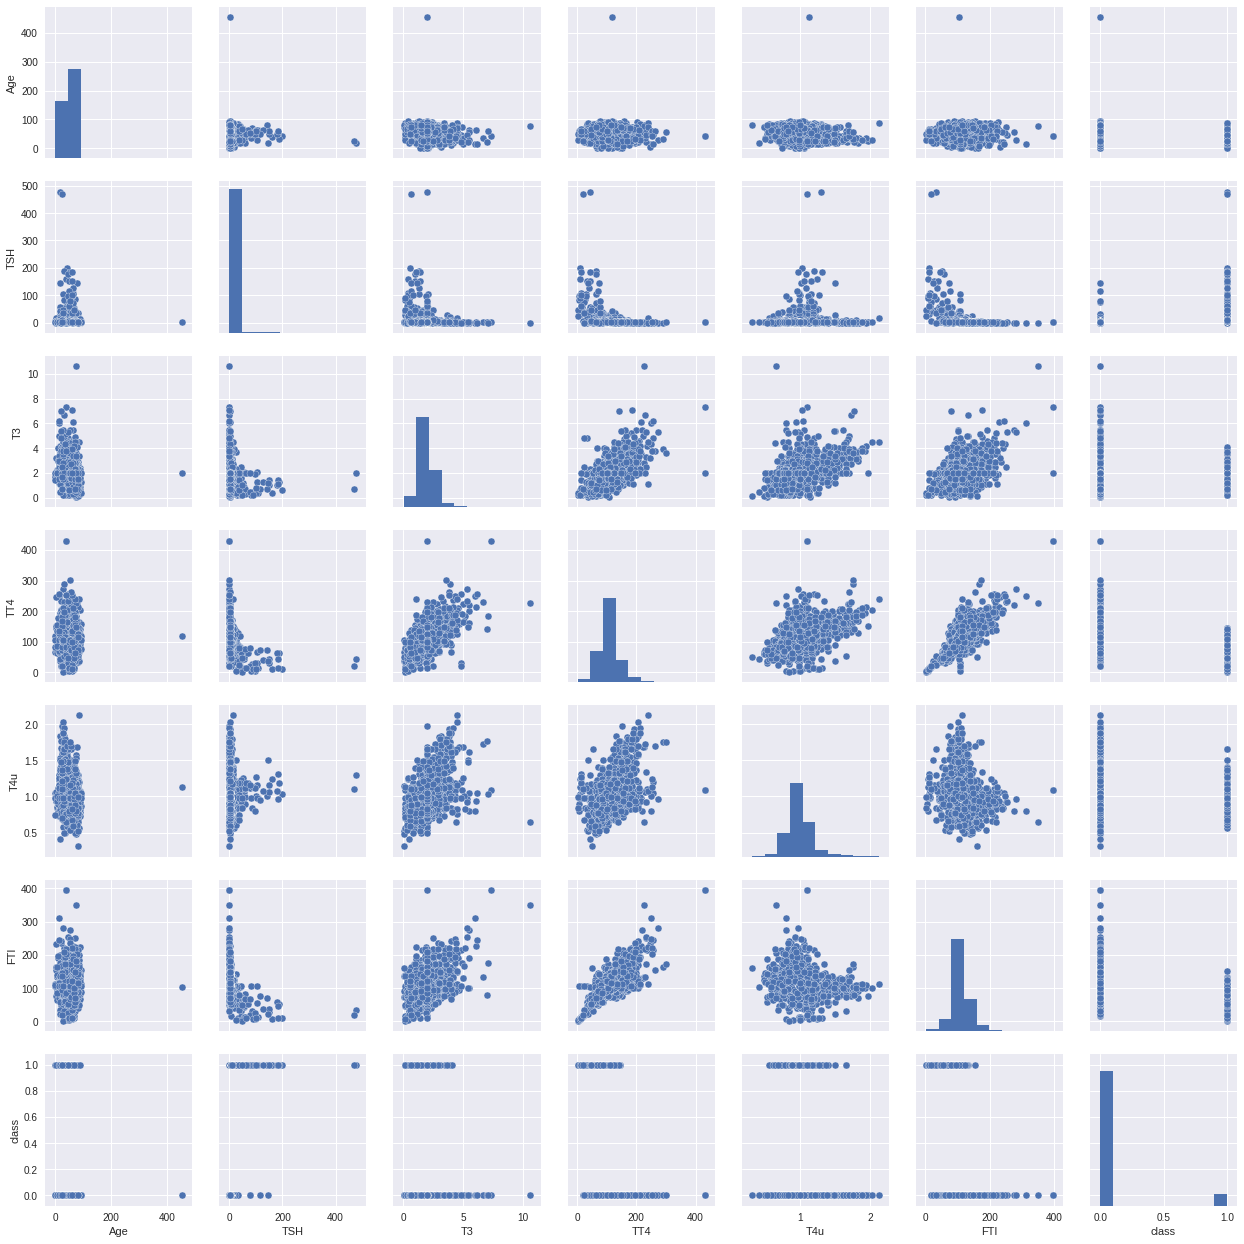

In [0]:
import seaborn as sns
sns.pairplot(dataset)

Another quick, holistic examination of what we're working with:

In [0]:
dataset[numeric_columns].describe()

,Age,TSH,T3,TT4,T4u,FTI
count,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000
mean,51.908922,4.200913,2.016766,108.741784,0.996340,110.323903
std,20.500639,18.657019,0.732492,34.287763,0.184463,30.824454
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.000000,0.590000,1.700000,89.000000,0.890000,95.000000
50%,54.000000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.000000,2.400000,2.200000,123.000000,1.070000,122.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000


In [0]:
data=dataset
for i in range(len(categorical_columns)):
  data[categorical_columns[i]]=po.get_dummies(data[categorical_columns[i]])
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,referral source,class
0,41.0,1,1,1,1,1,1,1,1,1,...,0,2.5,0,125.0,0,1.14,0,109.0,0,0
1,23.0,1,1,1,1,1,1,1,1,1,...,0,2.0,0,102.0,1,0.98,1,107.0,0,0
2,46.0,0,1,1,1,1,1,1,1,1,...,1,2.0,0,109.0,0,0.91,0,120.0,0,0
3,70.0,1,0,1,1,1,1,1,1,1,...,0,1.9,0,175.0,1,0.98,1,107.0,0,0
4,70.0,1,1,1,1,1,1,1,1,1,...,0,1.2,0,61.0,0,0.87,0,70.0,0,0
5,18.0,1,0,1,1,1,1,1,1,1,...,1,2.0,0,183.0,0,1.30,0,141.0,0,0
6,59.0,1,1,1,1,1,1,1,1,1,...,1,2.0,0,72.0,0,0.92,0,78.0,0,0
7,80.0,1,1,1,1,1,1,1,1,1,...,0,0.6,0,80.0,0,0.70,0,115.0,0,0
8,66.0,1,1,1,1,1,1,1,1,1,...,0,2.2,0,123.0,0,0.93,0,132.0,0,0
9,68.0,0,1,1,1,1,1,1,1,1,...,0,1.6,0,83.0,0,0.89,0,93.0,0,0


To start off, let's have our model predictors be "Age" and "Sex"

In [0]:
##testsetestest
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.20,random_state=87675309,stratify=data['class'])

train_X=train[["Age","Sex"]]

test_X=test[["Age","Sex"]]

train_Y=train['class']
test_Y=test['class']



In [0]:
from sklearn.tree import DecisionTreeClassifier
def dec_tree(train_X,train_Y,test_X):
  dt_model=DecisionTreeClassifier()
  dt_model.fit(train_X,train_Y)
  dt_prediction=dt_model.predict(test_X)
  dt_probabilities=dt_model.predict_proba(test_X)
  predictions = dt_probabilities[:,1]
  print('The accuracy of the Decision Tree is',dt_acc)
  return dt_prediction,predictions

dec_tree(train_X,train_Y,test_X)

The accuracy of the Decision Tree is 0.9219330855018587


array([0.15789474, 0.08      , 0.        , 0.13333333, 0.        ,
       0.19230769, 0.        , 0.05882353, 0.04347826, 0.03333333,
       0.03846154, 0.15384615, 0.04347826, 0.16      , 0.03333333,
       0.        , 0.03333333, 0.18181818, 0.        , 0.15789474,
       0.1875    , 0.13333333, 0.07407407, 0.        , 0.15789474,
       0.        , 0.05555556, 0.13333333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06666667,
       0.        , 0.15384615, 0.        , 0.08      , 0.        ,
       0.08333333, 0.        , 0.11111111, 0.09090909, 0.        ,
       0.        , 0.04347826, 0.05555556, 0.        , 0.        ,
       0.15      , 0.11111111, 0.        , 0.19230769, 0.22222222,
       0.19230769, 0.16      , 0.13333333, 0.08      , 0.13888889,
       0.02564103, 0.04347826, 0.08333333, 0.        , 0.13333333,
       0.08333333, 0.        , 0.19230769, 0.09090909, 0.1875    ,
       0.        , 0.13636364, 0.09090909, 0.        , 0.     

In [0]:

dt_acc=metrics.accuracy_score(dt_prediction,test_Y)
dt_acc

0.9219330855018587

Wow, a 92% accuracy achieved on the first try! Let's compare this to the expected case.

Let's compare it to a baseline performance using the Zero Rule algorithm

In [0]:
def zero_rule_algorithm_classification(train,test):
  outcomes=list(dataset["class"])
  prediction = max(set(outcomes),key=outcomes.count)
  predicted=[prediction for i in range(len(test))]
  return predicted

predictions=zero_rule_algorithm_classification(train_Y,test_Y)
(len(predictions)-len(test_Y[test_Y==1]))/len(test_Y)


0.9219330855018587

Comparing the accuracies, it looks like our decision tree model performed the same as our baseline model. Perhaps our accuracy of 92% wasn't all that great after all. Let's move on to more meaningful evaluation methods. To do so, instead of predicting actual class labels (0 or 1 in this case), let's instead predict the probability of receiving that class value.

In [0]:
fpr, tpr, threshold = metrics.roc_curve(test_Y, dec_tree(train_X,train_Y,test_X)[1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

The accuracy of the Decision Tree is 0.9219330855018587


0.6786194316436251

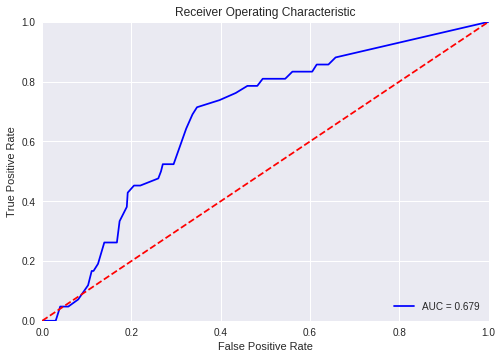

In [0]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Try removing certain columns and run the models again.

In [0]:
from sklearn.metrics import confusion_matrix
dt_conf_mat=confusion_matrix(test_Y, dec_tree(train_X,train_Y,test_X)[0])
dt_conf_mat

The accuracy of the Decision Tree is 0.9219330855018587


array([[496,   0],
       [ 42,   0]])

## Predicting on the test data: First we have to clean the test data!

In [0]:
import pandas as po
url="https://raw.githubusercontent.com/BeaverWorksMedlytics/datasets/master/allhypo.test.data.csv"
test_data=po.read_csv(url)

test_data=clean_data(test_data)

In [0]:
Group_Predictions=po.DataFrame({"Guess":dec_tree(train_X,train_Y,test_data[train_X.columns])[0],
                                "Prob_neg":1-dec_tree(train_X,train_Y,test_data[train_X.columns])[1],
                                "Prob_pos":dec_tree(train_X,train_Y,test_data[train_X.columns])[1]})
Group_Predictions

Lettuce Pickle our predictions!

In [0]:
import pickle
group_pred_pickle_path = 'group_predictions_pickle.pkl'

from google.colab import files
group_pred_pickle = open(group_pred_pickle_path, 'wb')
pickle.dump(Group_Predictions, group_pred_pickle)
files.download(group_pred_pickle_path)
group_pred_pickle.close()

(Send to beaverworksmedlytics@gmail.com)